In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset


In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 326s 2us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [10]:
y_train.shape

(50000, 1)

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array



In [24]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
y_test = y_test.reshape(-1,)


In [28]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


Let's plot some images to see what they are



In [31]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

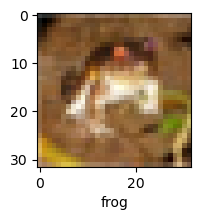

In [33]:
plot_sample(X_train, y_train, 0)


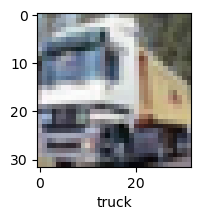

In [35]:
plot_sample(X_train, y_train, 1)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data


In [39]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification


In [42]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Neo Dev 1\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.3059 - loss: 1.9315
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4179 - loss: 1.6467
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.4529 - loss: 1.5585
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.4797 - loss: 1.4810
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.4992 - loss: 1.4374


In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.73      0.52      1000
           1       0.37      0.83      0.51      1000
           2       0.49      0.13      0.21      1000
           3       0.32      0.39      0.35      1000
           4       0.55      0.23      0.32      1000
           5       0.43      0.34      0.38      1000
           6       0.48      0.58      0.53      1000
           7       0.59      0.48      0.53      1000
           8       0.67      0.47      0.55      1000
           9       0.57      0.28      0.37      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



### Now let us build a convolutional neural network to train our images


In [47]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Neo Dev 1\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3719 - loss: 1.7216
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5862 - loss: 1.1700
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6422 - loss: 1.0207
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6810 - loss: 0.9065
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7085 - loss: 0.8406
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7304 - loss: 0.7740
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7412 - loss: 0.7418
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7635 - loss: 0.6770
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7786 - loss: 0.6379
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7908 - loss: 0.6042


In [52]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7009 - loss: 0.9128


[0.9160873293876648, 0.699999988079071]

In [55]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.5496559e-04, 4.2903034e-06, 1.6779159e-03, 8.9807278e-01,
        6.3675652e-05, 5.6979842e-02, 2.7252620e-03, 7.5081693e-06,
        4.0205266e-02, 8.5696365e-06],
       [2.7670920e-01, 2.1781807e-01, 6.8981206e-04, 5.2381431e-05,
        1.4004736e-05, 5.0169228e-06, 7.5919428e-07, 4.1485182e-06,
        5.0096965e-01, 3.7369016e-03],
       [5.3874797e-01, 1.2760997e-01, 3.5158310e-02, 2.4688762e-02,
        5.8151856e-03, 1.0138817e-02, 3.5368830e-03, 1.7093966e-02,
        1.9906272e-01, 3.8147409e-02],
       [8.5115594e-01, 9.4319624e-04, 7.7118557e-03, 1.4967427e-03,
        1.0790126e-02, 2.0599169e-05, 1.1358425e-03, 1.9423036e-05,
        1.2664382e-01, 8.2422375e-05],
       [1.3427145e-08, 3.2510897e-07, 1.3171179e-02, 1.6753541e-02,
        3.2671252e-01, 1.0400913e-03, 6.4231038e-01, 1.1817697e-05,
        1.3871698e-07, 1.5165984e-08]], dtype=float32)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

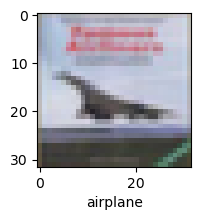

In [107]:
plot_sample(X_test, y_test,3)

In [85]:
classes[y_classes[3]]


'airplane'

In [99]:
classes[y_classes[60]]

'horse'